# Research Paper Summary : Machine learning based approach for detection of fake banknotes using support vector machine 

This paper is an exploration of the current problem of counterfeiting of currencies, which is an immense challenge to the financial systems of nations. The recent developments in printing technology have made fake banknotes almost identical to the real one in looks and feel, and detection is virtually impossible without machinery. The investigation suggests a machine-learning-based solution, which uses Support Vector Machines (SVM) to automatically differentiate between counterfeit and authentic banknotes, and provides a cost-effective alternative to hardware-based solutions based on detection, which may be installed in banks, ATMs, vending machines, and retail environments.

The authors used the Banknote Authentication Dataset provided by the University of California Irvine (UCI) Machine Learning Repository that comprised 1372 samples of banknotes. The data sample was collected by taking pictures of genuine and counterfeit of banknotes with the help of a high-end print-inspection camera. There were four main characteristics that were obtained through wavelet-transform methods, which were the variance, skewness, kurtosis, and entropy of the transformed images. In the data set, 762 samples are of the genuine group (class 0 ) and 610 samples are of the counterfeit group (class 1 ).

The main algorithm that was used is the Support Vector Machine that builds a perfect dividing hyperplane to optimize the distance between the true and fake classes. The SVM was set at 1, 000 iterations with 99 percent of the data being used both in training and testing. A Perceptron algorithm was also applied in order to compare performance with a supervised learning technique to evaluate relative performance.

The SVM model produced an outstanding accuracy of 99.55, which correctly classifies 545 of the test samples out of 548, with just three incorrectly classified samples. The Perceptron algorithm achieved 98.36-percent accuracy, with 539 hits and nine mistakes. The results indicate that SVM is very effective in banknote authentication and confirm that it can be a viable solution to automated currency authentication in various banking environments.

##  Data Set

The dataset used for this project is called $banknote Authentication$ which is downloaded from University of California (UCI) machine 
learning repository. which was produced using images of real and counterfeit banknote like specimens along with various wavelet transform tools to extract specific features from the images

It includes 1372 records with the below featurs:

- Varience --> A pixel's variance from nearby pixels is measured by variance
- Skewness --> Skewness meausres the degree of the image's asymmetry.
- Curtosis--> Kurtosis measures how heavily or lightly the data deviates from 
a normal distribution.
- Enrophy--> An image’s entropy, also known as its average information, serves as a gauge for how random the image is.
- Class --> Genuine notes are represented by class 0, whereas fake notes are 
represented by class 1.



# SETTING UP THE ENVIRONMENT

In [1]:
# import required libraries
import pandas as pd

# train test split
from sklearn.model_selection import train_test_split

# performance measures 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the data
bnotes = pd.read_excel("banknotes.xlsx")

## INITIAL EDA


In [3]:
# observe the top 5 records of the dataset
bnotes.head()

,Variance,Skewness,Curtosis,Entrophy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
# check the shape of the dataset
bnotes.shape

(1372, 5)

- There are **1372 records** across **5 features**.

In [5]:
# observe the data types
bnotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entrophy  1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
# check for the number of null records
num_rows_with_nulls = bnotes.isnull().any(axis=1).sum()
print(f"Number of rows with at least one null value: {num_rows_with_nulls}")

Number of rows with at least one null value: 0


In [7]:
# since Class is what we predict, let's observe the class distribution.
bnotes["Class"].value_counts()

Class
0    762
1    610
Name: count, dtype: int64

- From the values above, it is clear that the class distribution of the variable $Class$ is slightly imbalanced; however, there is no severe imbalance.

In [8]:
# get the numerical summary of the data
bnotes.describe()

,Variance,Skewness,Curtosis,Entrophy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


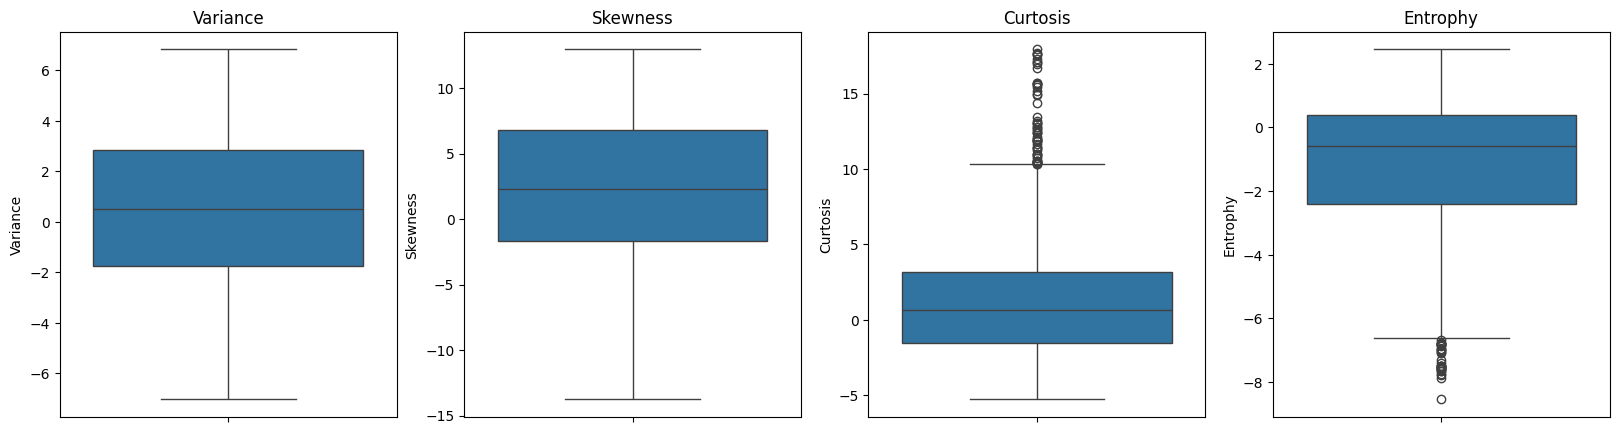

In [9]:
# numerical columns with a distribution that can contain outliers
num_cols_dist = ['Variance', 'Skewness','Curtosis','Entrophy']

# box plots for checking outliers
plt.figure(figsize=(20,5))
for i, col in enumerate(num_cols_dist, 1):
    plt.subplot(1, len(num_cols_dist), i) # creating subplots
    sns.boxplot(y=bnotes[col])
    plt.title(col)
    
plt.show()

- Based on the box plots above, the $Curtosis$ and $Entrophy$ columns appears to contain some outliers, as indicated by the points beyond the whiskers of the plot.

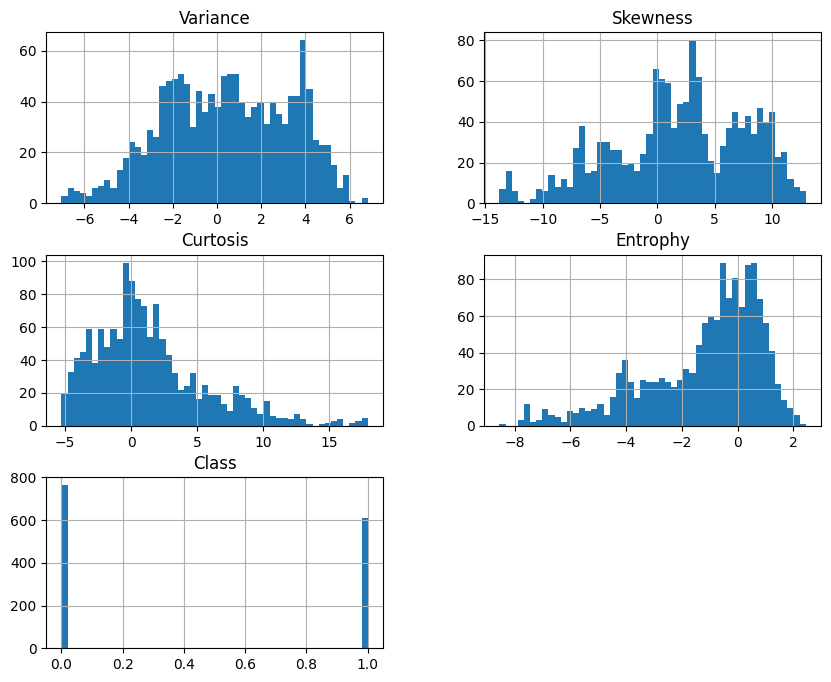

In [10]:
# observe the distribution of each numerical feature
bnotes.hist(bins=50, figsize=(10,8))
plt.show()

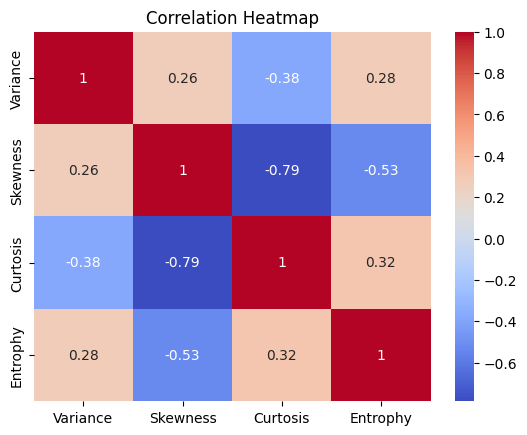

In [11]:
num_cols = ['Variance', 'Skewness','Curtosis','Entrophy']
corr_matrix = bnotes[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- The variables $Curtosis$ and $Skewness$ exhibit a substantial negative correlation of -0.79. This indicates a significant negative relationship between the two variables, suggesting that as one increases, the other tends to decrease.

##  TRAIN -TEST DATA PREPARATION 

In [12]:
# train test split based on Species classes
train_df, test_df = train_test_split(
    bnotes, 
    test_size=0.3,   # test size 30%   
    random_state=42, 
    stratify=bnotes["Class"] # stratified sampling 
)

## HANDLING OUTLIERS

In [13]:
# defining a function to replace outliers in Curtosis & Entrophy  with mean after grouping by Class
for colomn in ['Curtosis','Entrophy'] :
        def replace_outliers_with_group_mean_fare(train_df, test_df, col=colomn, group_col='Class', factor=1.5):
            train = train_df.copy()
            test = test_df.copy()

            for grp in train[group_col].unique():
                # subset for group
                grp_vals = train.loc[train[group_col] == grp, col]
                Q1 = grp_vals.quantile(0.25)
                Q3 = grp_vals.quantile(0.75)
                IQR = Q3 - Q1

                lower_bound = Q1 - factor * IQR
                upper_bound = Q3 + factor * IQR
                

                # calculate mean of the column (excluding outliers)
                col_mean = grp_vals[(grp_vals >= lower_bound) & (grp_vals <= upper_bound)].mean()

                # replace in train
                train.loc[(train[group_col] == grp) & ((train[col] < lower_bound) | (train[col] > upper_bound)), col] = col_mean

                # replace in test
                test.loc[(test[group_col] == grp) & ((test[col] < lower_bound) | (test[col] > upper_bound)), col] = col_mean

            return train, test

# applying the function
train_df_treated, test_df_treated = replace_outliers_with_group_mean_fare(train_df, test_df)

- The analysis of the Curtosis and Entropy variables reveals the presence of outliers. To address this, the next step involves calculating the mean for the two groups (0 and 1) for each variable, excluding these outliers. Subsequently, the identified outliers  have been replaced with the corresponding group mean of their respective variables.

In [14]:
# prepare a clean set of training data
bnotes_train_x = train_df_treated.drop("Class", axis=1)
bnotes_train_y = train_df_treated["Class"].copy()

# prepare a clean set of test data
bnotes_test_x = test_df_treated.drop("Class", axis=1)
bnotes_test_y = test_df_treated["Class"].copy()

## IMPLEMENT SVM ALGORITHM IN RESEARCH PAPER (KERNEL = LINEAR)

In [15]:
from sklearn.svm import SVC
# fitting a polynomial kernel SVM classifier
svm_pol_model = SVC(kernel="linear",C=1,random_state=42,max_iter=1000)

# fit the model
svm_pol_model.fit(bnotes_train_x, bnotes_train_y)

# predict the test set
y_pred_svm_pol = svm_pol_model.predict(bnotes_test_x)

c:\Users\ginid\anaconda3\envs\myenv\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [16]:
# confusion matrix
cm_svm_pol = confusion_matrix(bnotes_test_y, y_pred_svm_pol,  labels=[0,1])

# convert the matrix to a df with labels
cm_svm_pol_df = pd.DataFrame(
    cm_svm_pol, 
    index=['Actual Genuine', 'Actual Fake'], 
    columns=['Predicted Genuine', 'Predicted Fake']
)

print(cm_svm_pol_df)

                Predicted Genuine  Predicted Fake
Actual Genuine                225               4
Actual Fake                     0             183


In [17]:
# get a classification report
print(classification_report(bnotes_test_y, y_pred_svm_pol,  labels=[0,1], target_names=['Genuine', 'Fake']))

              precision    recall  f1-score   support

     Genuine       1.00      0.98      0.99       229
        Fake       0.98      1.00      0.99       183

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



In the research paper, an accuracy rate of 99.55% was reported for the Support Vector Machine (SVM) using a linear kernel. My algorithm achieved an accuracy of 99%, which is due to four genuine notes being incorrectly classified as fake. We can suspect that these differences may occur for the following reasons:

- The size of the train-test split may differ; I used a 30% test set.
- The methods for handling outliers may vary. In my approach, I filled outliers with the mean of their respective groups, both for genuine and fake notes.
- The random state may differ.
- The hyperparameters may differ.

To improve accuracy, we are creating an SVM model with a polynomial kernel, as we expect this kernel to perform better than the linear kernel.

# SVM ALGORITHM WITH KERNEL = 'POLY'

In [18]:
from sklearn.svm import SVC
# fitting a polynomial kernel SVM classifier
svm_pol_model = SVC(kernel="poly", degree=3, C=1, coef0 = 1, random_state=42,max_iter=1000)

# fit the model
svm_pol_model.fit(bnotes_train_x, bnotes_train_y)

# predict the test set
y_pred_svm_pol = svm_pol_model.predict(bnotes_test_x)

In [19]:
# confusion matrix
cm_svm_pol = confusion_matrix(bnotes_test_y, y_pred_svm_pol,  labels=[0,1])

# convert the matrix to a df with labels
cm_svm_pol_df = pd.DataFrame(
    cm_svm_pol, 
    index=['Actual Genuine', 'Actual Fake'], 
    columns=['Predicted Genuine', 'Predicted Fake']
)

print(cm_svm_pol_df)

                Predicted Genuine  Predicted Fake
Actual Genuine                228               1
Actual Fake                     0             183


In [20]:
# get a classification report
print(classification_report(bnotes_test_y, y_pred_svm_pol,  labels=[0,1], target_names=['Genuine', 'Fake']))

              precision    recall  f1-score   support

     Genuine       1.00      1.00      1.00       229
        Fake       0.99      1.00      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



- SVM algorithm with polynomial kernel confusion matrix shows that all test data was predicted correctly except for one data point. One genuine note was incorrectly predicted as fake, indicating that the polynomial kernel is better than the linear kernel. The accuracy is almost 100%.

# HYPER PARAMETER TUNING

In [21]:
from sklearn.model_selection import RandomizedSearchCV

# define the hyperparameter grid for polynomial SVM
param_grid = {
    'C': [0.1, 1, 3, 5],            # regularization parameter
    'degree': [2, 3, 4, 5],             # degree of the polynomial kernel
    'coef0': [0.1, 0.5, 1, 2, 5],
    }

# SVM classifier with polynomial kernel
svm_pol_model_2 = SVC(kernel='poly')


# perform random search with 5-fold cross-validation
grid_svm_pol = RandomizedSearchCV(svm_pol_model_2, param_distributions=param_grid,
                                 n_iter=50, cv=5, scoring='accuracy', random_state=42)

# grid_svm_pol = GridSearchCV(svm_pol_model_2, param_grid, cv=5, scoring='accuracy')

grid_svm_pol.fit(bnotes_train_x, bnotes_train_y)

# print best hyperparameters and best CV score
print("Best hyperparameters:", grid_svm_pol.best_params_)
print("Best CV score:", grid_svm_pol.best_score_)

Best hyperparameters: {'degree': 4, 'coef0': 5, 'C': 0.1}
Best CV score: 1.0


-   We conducted hyperparameter tuning to identify the optimal parameters for improving model accuracy. Specifically, we set the 
`n_iter` parameter to 50, allowing the search to explore 50 random combinations from the available `param_distributions`. To select the best parameters, we employed 5-fold cross-validation, which resulted in achieving a remarkable accuracy score of 100%.

# CREATE SVM WITH BEST HYPER PARAMETERS

In [22]:
# create SVM classifier with the best hyperparameters
best_svm_model = SVC(kernel="poly", **grid_svm_pol.best_params_, random_state=42, max_iter=1000)

# fit on the training data
best_svm_model.fit(bnotes_train_x, bnotes_train_y)

# predict on test data
best_svm_pred = best_svm_model.predict(bnotes_test_x)

In [23]:
# confusion matrix
cm_svm_best = confusion_matrix(bnotes_test_y, best_svm_pred,  labels=[0,1])

# convert the matrix to a df with labels
cm_svm_best_df = pd.DataFrame(
    cm_svm_best, 
    index=['Actual Genuine', 'Actual Fake'], 
    columns=['Predicted Genuine', 'Predicted Fake']
)

print(cm_svm_best_df)

                Predicted Genuine  Predicted Fake
Actual Genuine                229               0
Actual Fake                     0             183


In [24]:
# get a classification report
print(classification_report(bnotes_test_y, best_svm_pred,  labels=[0,1], target_names=['Genuine', 'Fake']))

              precision    recall  f1-score   support

     Genuine       1.00      1.00      1.00       229
        Fake       1.00      1.00      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



-  After tuning the hyperparameters and getting the best parameters, we were able to predict all data points correctly. Now, the accuracy is 100%, which is higher than the accuracy indicated in the research paper (99.5%).
